In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Importing require Libraries
import os

import matplotlib.pyplot as plt
import nltk
from tkinter import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import scipy

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tensorflow.python import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


# Milestone One

In [2]:
# Load compressed models from tensorflow_hub
os.environ["TFHUB_MODEL_LOAD_FORMAT"] = "COMPRESSED"

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.3.1
Eager mode:  True
Hub version:  0.9.0
GPU is available


1. # Load IMDb movie review dataset.
Use the tf.keras.datasets IMDb module to load the data. See TensorFlow Core 2.0 for reference.

In [3]:
# this cells takes time, please run once
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
original_train_data, original_validation_data, original_test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSAX173/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSAX173/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteSAX173/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113,
    start_char=1, oov_char=2, index_from=3
)

17465344/17464789 [==============================] - 0s 0us/step


*Explore the data*

In [5]:
#tokanizing by tensorflow
word_index = tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

1646592/1641221 [==============================] - 0s 0us/step


In [6]:
type(word_index)

dict

In [7]:
len(word_index)

88584

In [8]:
{k:v for (k,v) in word_index.items() if v < 20}

{'with': 16,
 'i': 10,
 'as': 14,
 'it': 9,
 'is': 6,
 'in': 8,
 'but': 18,
 'of': 4,
 'this': 11,
 'a': 3,
 'for': 15,
 'br': 7,
 'the': 1,
 'was': 13,
 'and': 2,
 'to': 5,
 'film': 19,
 'movie': 17,
 'that': 12}

In [9]:
""# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [10]:
example1 = decode_review(x_train[0])
example1

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and sh

In [11]:
new_x_train=x_train.reshape(len(x_train), 1)
new_x_train

array([[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
       [list([1, 194

In [12]:
mylen = np.vectorize(len)
print(mylen(x_train))

[218 189 141 ... 184 150 153]


**Examine data structure of this dataset**

In [13]:
(train_data, train_labels), (test_data, test_labels) = (x_train, y_train), (x_test, y_test)

In [14]:
print('train_data shape:', train_data.shape)
print('train_labels shape:', train_labels.shape)
print('a train_data sample:', train_data[0])
print('a train_label sample:', train_labels[0])

train_data shape: (25000,)
train_labels shape: (25000,)
a train_data sample: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 

In [15]:
print('test_data shape:', test_data.shape)
print('test_labels shape:', test_labels.shape)
print('a test_data sample:', test_data[0])
print('a test_label sample:', test_labels[0])

test_data shape: (25000,)
test_labels shape: (25000,)
a test_data sample: [1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
a test_label sample: 0


1. *Identify positive reviews in the dataset*
2. *determine positions of positive and negative reviews*
3. *Determine the index for each review type*

Identify the positive review and negetive review 

In [16]:
# Positive movie review
positive_review_location = np.where(train_labels > 0)[0]
positive_review_location

array([    0,     3,     6, ..., 24994, 24995, 24998])

In [17]:
positive_index = np.where(y_train == 1) 
positive_reviews = x_train[positive_index]
np.shape(positive_reviews)

(12500,)

** How is length different between positive and negative reviews?**

In [18]:
positive_review_length = [len(i) for i in positive_reviews] 

from collections import Counter
type(Counter(positive_review_length))

collections.Counter

In [19]:
from collections import Counter
positive_most_common_length,p_frequency_of_occurrence = Counter(positive_review_length).most_common(1)[0]
print('The most frequent length for positive review is %d words and it occurs %d times' %(positive_most_common_length,p_frequency_of_occurrence))

The most frequent length for positive review is 125 words and it occurs 95 times


In [20]:
# Negetive movie review
negetive_review_location = np.where(train_labels < 1)
negetive_review_location

(array([    1,     2,     4, ..., 24996, 24997, 24999]),)

In [21]:
negative_index = np.where(y_train == 0)
negative_reviews = x_train[negative_index]
np.shape(negative_reviews)

(12500,)

In [22]:
negative_review_length = [len(i) for i in negative_reviews] 
from collections import Counter
type(Counter(positive_review_length))

collections.Counter

In [23]:
negative_most_common_length,n_frequency_of_occurrence = Counter(negative_review_length).most_common(1)[0]
print('The most frequent length for negative review is %d words and it occurs %d times' %(negative_most_common_length,n_frequency_of_occurrence))

The most frequent length for negative review is 132 words and it occurs 105 times


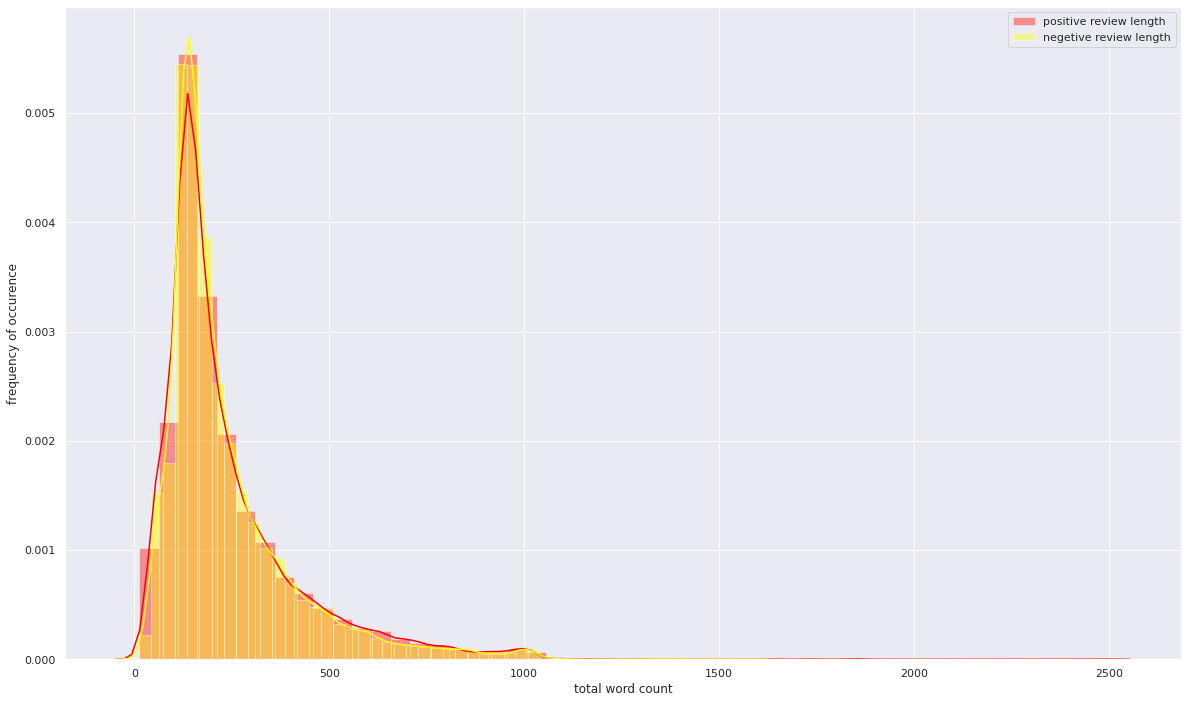

In [24]:
# seaborn plot 
fig, ax = plt.subplots(figsize=(20, 12))

sns.distplot( positive_review_length , color="red", label="positive review length")
sns.distplot( negative_review_length , color="yellow", label="negetive review length")
ax.legend()
ax.set(xlabel='total word count', ylabel='frequency of occurence')

plt.show()

# Milestopne One Complete

# Milestone Two

**Index the data by label**

In [25]:
positive_index = np.argwhere(y_train == 1)
positive_index

array([[    0],
       [    3],
       [    6],
       ...,
       [24994],
       [24995],
       [24998]])

In [26]:
positive_index = np.where(y_train == 1)[0]
positive_index

array([    0,     3,     6, ..., 24994, 24995, 24998])

In [27]:
positive_lebel = train_labels[(train_labels>0)]
positive_lebel = np.where(positive_lebel==True, 1, positive_lebel)

In [28]:
negetive_index = np.argwhere(y_train == 0)
negetive_index

array([[    1],
       [    2],
       [    4],
       ...,
       [24996],
       [24997],
       [24999]])

In [29]:
negetive_index = np.where(y_train == 0)[0]
negetive_index

array([    1,     2,     4, ..., 24996, 24997, 24999])

In [30]:
negetive_lebel = train_labels[(train_labels<1)]
negetive_lebel = np.where(negetive_lebel==False, 0, negetive_lebel)
negetive_lebel

array([0, 0, 0, ..., 0, 0, 0])

**Reducing the number of positive review by 50%**

In [31]:
half_len  = len(positive_index)/2
half_len

6250.0

In [32]:
positive_index.shape

(12500,)

Randomly deleting array 6250 element from the positive list

In [33]:
arr = positive_index
# numbers below will never contain repeated numbers (replace=False)
positive_index = np.random.choice(arr, 6250, replace=False) 
positive_index

array([ 8157, 16461, 22775, ..., 22021, 23266, 13195])

In [34]:
positive_index.shape

(6250,)

In [35]:
arr = positive_lebel
# numbers below will never contain repeated numbers (replace=False)
positive_lebel = np.random.choice(arr, 6250, replace=False) 
positive_lebel

array([1, 1, 1, ..., 1, 1, 1])

In [36]:
positive_lebel.shape

(6250,)

# Starting 2.1

We[](http://) need to determine if oversampling is a helpful means of providing balanced training data for text classification.

In [37]:
positive_index = np.tile(positive_index, 2)
positive_lebel = np.tile(positive_lebel, 2)

In [38]:
print(positive_index.shape)
print(positive_lebel.shape)

(12500,)
(12500,)


In [39]:
print(negetive_index.shape)
print(negetive_lebel.shape)

(12500,)
(12500,)


> Concatenate all reviews.

In [40]:
# mixed for index
mixed_review = np.concatenate((positive_index, negetive_index))
mixed_review.shape

(25000,)

In [41]:
# mixed for lebel
mixed_lebel = np.concatenate((positive_lebel, negetive_lebel), axis=None)
mixed_review.shape

(25000,)

# Ending 2.1

# Starting 2.2

> Add special tokens to handle exceptions

In [42]:
word_dict = {v: k for k, v in word_index.items()}

def get_sentence(arr):
    return ' '.join(word_dict[i] for i in arr)

In [43]:
x_test.shape

(25000,)

In [44]:
x_train.shape


(25000,)

In [45]:
# create a replicate positive review
x_train_mixd = x_train[mixed_review]
y_train_mixd = y_train[mixed_review]
print(x_train_mixd.shape)
print(y_train_mixd.shape)

(25000,)
(25000,)


In [46]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [48]:
vocab_size = 256

In [49]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(x_train_mixd,
                                                          value=word_index["<PAD>"],
                                                          padding='post',
                                                          maxlen=vocab_size)


In [50]:
# also pad test dataset
test_data = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                         value=word_index["<PAD>"],
                                                          padding='post',
                                                          maxlen=vocab_size)

# End of 2.2

# Start of 2.3

# Building a Model

In [52]:
# x_array = []
# y_array = [1] * len(positive_reviews) +  [0] * len(negative_reviews)
# for i in range(0, len(positive_reviews)):
#     x_array.append(positive_reviews[i])
# for i in range(0, len(negative_reviews)):
#     x_array.append(negative_reviews[i])
# train_data = tf.keras.preprocessing.sequence.pad_sequences(x_array,padding='post', maxlen=256)
# test_data = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=256, padding='post')
# print(train_data.shape, test_data.shape)

(25000, 256) (25000, 256)


In [57]:
def create_model():
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(88587, 64),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64,activation="relu"),
        tf.keras.layers.Dense(1,activation="sigmoid")])
    return model

In [58]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          5669568   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               197632    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,883,713
Trainable params: 5,883,713
Non-trainable params: 0
_________________________________________________________________


In [93]:
final_x_train, x_val, final_y_train, y_val = train_test_split(train_data, y_train_mixd, test_size=0.33 )

In [94]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['acc'])

In [95]:
num_epochs = 5

In [96]:
from sklearn.model_selection import train_test_split
H = model.fit(final_x_train,
             final_y_train,
             epochs=num_epochs,
             batch_size=512,
             validation_data=(x_val, y_val),
             verbose=1
             )

Epoch 1/5
33/33 [==============================] - 6s 168ms/step - loss: 0.2205 - acc: 0.9318 - val_loss: 0.0823 - val_acc: 0.9743
Epoch 2/5
33/33 [==============================] - 5s 147ms/step - loss: 0.0557 - acc: 0.9845 - val_loss: 0.0805 - val_acc: 0.9767
Epoch 3/5
33/33 [==============================] - 5s 147ms/step - loss: 0.0259 - acc: 0.9936 - val_loss: 0.0861 - val_acc: 0.9760
Epoch 4/5
33/33 [==============================] - 5s 150ms/step - loss: 0.0104 - acc: 0.9977 - val_loss: 0.1048 - val_acc: 0.9730
Epoch 5/5
33/33 [==============================] - 5s 147ms/step - loss: 0.0038 - acc: 0.9993 - val_loss: 0.1205 - val_acc: 0.9735


In [97]:
def plot_graphs(H, metric):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, num_epochs), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, num_epochs), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, num_epochs), H.history["acc"], label="train_acc")
    plt.plot(np.arange(0, num_epochs), H.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.savefig("model_history")
    plt.show()

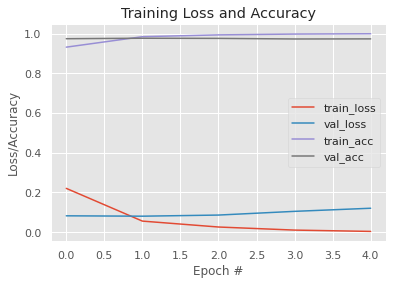

In [98]:
plot_graphs(H, 'acc')


In [99]:
preds = model.predict(test_data)

In [100]:
preds

array([[6.8759063e-04],
       [9.9995625e-01],
       [9.9981326e-01],
       ...,
       [2.1714489e-04],
       [6.2043935e-02],
       [9.9888366e-01]], dtype=float32)

In [101]:
preds = preds >= 0.5

In [102]:
cm = confusion_matrix(y_test, preds )
df_cm = pd.DataFrame(
        cm, index=['bad', 'good'], columns=['bad', 'good'], 
    )
df_cm.head()

,bad,good
bad,10745,1755
good,2282,10218


In [103]:
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     12500
           1       0.85      0.82      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

